In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, average_precision_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import BorderlineSMOTE, SMOTENC, RandomOverSampler
from imblearn.ensemble import EasyEnsembleClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
import tensorflow 
from tensorflow.keras import Model 
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [2]:
def sklearn_model_build(clf, params, x_train, y_train, x_test, y_test):
    search = GridSearchCV(clf, params, cv=5, scoring='average_precision')
    search.fit(x_train, y_train)
    print('best parameters:', search.best_params_, '\n')
    print('best average precision with training data:', round(search.best_score_,2))
    model = search.best_estimator_
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print('accuracy_score:', accuracy_score(y_test, preds), '\n', 'average precision score with testing:', average_precision_score(y_test, preds), '\n')
    print('classification report', '\n', classification_report(y_test, preds), '\n')
    sns.heatmap(confusion_matrix(y_test,preds), annot=True, fmt='.0f')
    plt.show()
    


In [3]:
def anova_table(y, x, data):
    lm = ols(f'Q("{y}") ~ Q({"x"})', data = data).fit()
    table = sm.stats.anova_lm(lm, type = 2)
    print(table)

In [4]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
df.shape

(8763, 26)

In [7]:
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [8]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [9]:
df.value_counts()

Patient ID  Age  Sex     Cholesterol  Blood Pressure  Heart Rate  Diabetes  Family History  Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet       Previous Heart Problems  Medication Use  Stress Level  Sedentary Hours Per Day  Income  BMI        Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  Country        Continent      Hemisphere           Heart Attack Risk
AAA9246     61   Male    171          148/90          89          1         1               1        0        1                    8.123736                 Unhealthy  1                        0               9             8.453044                 108612  27.098445  626            3                                5                    New Zealand    Australia      Southern Hemisphere  0                    1
RPT9211     37   Male    394          133/90          70          0         0               1        0        1                    1.165282                 Average    1                   

In [10]:
binary_columns = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use']
binary_df = df[binary_columns]

for column in binary_df.columns:
    print(df.groupby(by = column)['Heart Attack Risk'].size())

Sex
Female    2652
Male      6111
Name: Heart Attack Risk, dtype: int64
Diabetes
0    3047
1    5716
Name: Heart Attack Risk, dtype: int64
Family History
0    4443
1    4320
Name: Heart Attack Risk, dtype: int64
Smoking
0     904
1    7859
Name: Heart Attack Risk, dtype: int64
Alcohol Consumption
0    3522
1    5241
Name: Heart Attack Risk, dtype: int64
Diet
Average      2912
Healthy      2960
Unhealthy    2891
Name: Heart Attack Risk, dtype: int64
Previous Heart Problems
0    4418
1    4345
Name: Heart Attack Risk, dtype: int64
Medication Use
0    4396
1    4367
Name: Heart Attack Risk, dtype: int64


In [11]:
df.select_dtypes(include=['int64', 'float64']).var()

Age                                4.515416e+02
Cholesterol                        6.538869e+03
Heart Rate                         4.223415e+02
Diabetes                           2.268342e-01
Family History                     2.499793e-01
Smoking                            9.252938e-02
Obesity                            2.500265e-01
Alcohol Consumption                2.404072e-01
Exercise Hours Per Week            3.345171e+01
Previous Heart Problems            2.500112e-01
Medication Use                     2.500258e-01
Stress Level                       8.177437e+00
Sedentary Hours Per Day            1.201565e+01
Income                             6.492361e+09
BMI                                3.993205e+01
Triglycerides                      5.006323e+04
Physical Activity Days Per Week    5.210661e+00
Sleep Hours Per Day                3.954024e+00
Heart Attack Risk                  2.299220e-01
dtype: float64

In [12]:
for i in df.select_dtypes(include=['float64', 'int64']).columns:
    print(df.groupby(by = 'Heart Attack Risk')[f'{i}'].mean())


Heart Attack Risk
0    53.606330
1    53.890092
Name: Age, dtype: float64
Heart Attack Risk
0    258.708926
1    261.970373
Name: Cholesterol, dtype: float64
Heart Attack Risk
0    75.086949
1    74.904747
Name: Heart Rate, dtype: float64
Heart Attack Risk
0    0.646159
1    0.663269
Name: Diabetes, dtype: float64
Heart Attack Risk
0    0.493599
1    0.491876
Name: Family History, dtype: float64
Heart Attack Risk
0    0.89776
1    0.89519
Name: Smoking, dtype: float64
Heart Attack Risk
0    0.506401
1    0.492514
Name: Obesity, dtype: float64
Heart Attack Risk
0    0.603129
1    0.589041
Name: Alcohol Consumption, dtype: float64
Heart Attack Risk
0     9.966182
1    10.100466
Name: Exercise Hours Per Week, dtype: float64
Heart Attack Risk
0    0.495733
1    0.496018
Name: Previous Heart Problems, dtype: float64
Heart Attack Risk
0    0.497511
1    0.499841
Name: Medication Use, dtype: float64
Heart Attack Risk
0    5.478485
1    5.453966
Name: Stress Level, dtype: float64
Heart Attack 

In [13]:
df.nunique()

Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2


In [14]:
df.drop('Patient ID', axis = 1, inplace= True)


In [15]:

for column in df.columns:
    print(f'Anova Table for {column}:', '\n')
    anova_table('Heart Attack Risk', f'{column}', data = df)

Anova Table for Age: 

              df       sum_sq   mean_sq         F    PR(>F)
Q(x)         1.0     0.082599  0.082599  0.359223  0.548954
Residual  8761.0  2014.494144  0.229939       NaN       NaN
Anova Table for Sex: 

              df       sum_sq   mean_sq        F    PR(>F)
Q(x)         1.0     0.019302  0.019302  0.08394  0.772034
Residual  8761.0  2014.557441  0.229946      NaN       NaN
Anova Table for Cholesterol: 

              df       sum_sq   mean_sq         F    PR(>F)
Q(x)         1.0     0.753498  0.753498  3.278043  0.070247
Residual  8761.0  2013.823245  0.229862       NaN       NaN
Anova Table for Blood Pressure: 

              df       sum_sq   mean_sq         F    PR(>F)
Q(x)      3914.0   892.856505  0.228119  0.985914  0.679247
Residual  4848.0  1121.720238  0.231378       NaN       NaN
Anova Table for Heart Rate: 

              df       sum_sq   mean_sq         F    PR(>F)
Q(x)         1.0     0.036409  0.036409  0.158338  0.690701
Residual  8761.0  2014

In [16]:
df.nunique()

Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemisphere                            2
Heart Attack Risk                     2


In [17]:
df.head(1)

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0


In [18]:
df.drop(['Hemisphere', 'Country'], axis = 1, inplace=True)

In [19]:
df.drop('Blood Pressure', axis = 1, inplace = True)

In [20]:
sex_map = {'Male': 0, 'Female': 1}

df['Sex'] = df['Sex'].map(sex_map)

df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Heart Attack Risk
0,67,0,208,72,0,0,1,0,0,4.168189,...,0,9,6.615001,261404,31.251233,286,0,6,South America,0
1,21,0,389,98,1,1,1,1,1,1.813242,...,0,1,4.963459,285768,27.194973,235,1,7,North America,0
2,21,1,324,72,1,0,0,0,0,2.078353,...,1,9,9.463426,235282,28.176571,587,4,4,Europe,0
3,84,0,383,73,1,1,1,0,1,9.828130,...,0,9,7.648981,125640,36.464704,378,3,4,North America,0
4,66,0,318,93,1,1,1,1,0,5.804299,...,0,6,1.514821,160555,21.809144,231,1,5,Asia,0


In [21]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Continent',
       'Heart Attack Risk'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Heart Rate                       8763 non-null   int64  
 4   Diabetes                         8763 non-null   int64  
 5   Family History                   8763 non-null   int64  
 6   Smoking                          8763 non-null   int64  
 7   Obesity                          8763 non-null   int64  
 8   Alcohol Consumption              8763 non-null   int64  
 9   Exercise Hours Per Week          8763 non-null   float64
 10  Diet                             8763 non-null   object 
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [23]:
df.drop('Stress Level', axis = 1, inplace = True)

In [24]:
onehot = OneHotEncoder(sparse= False)
oh_data = onehot.fit_transform(df[['Diet', 'Continent', 'Physical Activity Days Per Week']])
oh_df = pd.DataFrame(oh_data, columns= onehot.get_feature_names_out())
oh_df = oh_df.convert_dtypes()
print(oh_df)


      Diet_Average  Diet_Healthy  Diet_Unhealthy  Continent_Africa  \
0                1             0               0                 0   
1                0             0               1                 0   
2                0             1               0                 0   
3                1             0               0                 0   
4                0             0               1                 0   
...            ...           ...             ...               ...   
8758             0             1               0                 0   
8759             0             1               0                 0   
8760             1             0               0                 0   
8761             0             0               1                 0   
8762             0             1               0                 0   

      Continent_Asia  Continent_Australia  Continent_Europe  \
0                  0                    0                 0   
1                  0             

c:\Users\dgmur\python\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:


# Concatenate the DataFrames
df = pd.concat([df, oh_df], axis=1)

In [26]:
df.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent_North America,Continent_South America,Physical Activity Days Per Week_0,Physical Activity Days Per Week_1,Physical Activity Days Per Week_2,Physical Activity Days Per Week_3,Physical Activity Days Per Week_4,Physical Activity Days Per Week_5,Physical Activity Days Per Week_6,Physical Activity Days Per Week_7
0,67,0,208,72,0,0,1,0,0,4.168189,...,0,1,1,0,0,0,0,0,0,0
1,21,0,389,98,1,1,1,1,1,1.813242,...,1,0,0,1,0,0,0,0,0,0
2,21,1,324,72,1,0,0,0,0,2.078353,...,0,0,0,0,0,0,1,0,0,0
3,84,0,383,73,1,1,1,0,1,9.828130,...,1,0,0,0,0,1,0,0,0,0
4,66,0,318,93,1,1,1,1,0,5.804299,...,0,0,0,1,0,0,0,0,0,0


In [27]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Continent',
       'Heart Attack Risk', 'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy',
       'Continent_Africa', 'Continent_Asia', 'Continent_Australia',
       'Continent_Europe', 'Continent_North America',
       'Continent_South America', 'Physical Activity Days Per Week_0',
       'Physical Activity Days Per Week_1',
       'Physical Activity Days Per Week_2',
       'Physical Activity Days Per Week_3',
       'Physical Activity Days Per Week_4',
       'Physical Activity Days Per Week_5',
       'Physical Activity Days Per Week_6',
       'Physical Activity Days Per Week_7'],
      dtype='object')

In [28]:
df.groupby(by = 'Sex')['Heart Attack Risk'].size()

Sex
0    6111
1    2652
Name: Heart Attack Risk, dtype: int64

In [29]:
df.head(1)

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent_North America,Continent_South America,Physical Activity Days Per Week_0,Physical Activity Days Per Week_1,Physical Activity Days Per Week_2,Physical Activity Days Per Week_3,Physical Activity Days Per Week_4,Physical Activity Days Per Week_5,Physical Activity Days Per Week_6,Physical Activity Days Per Week_7
0,67,0,208,72,0,0,1,0,0,4.168189,...,0,1,1,0,0,0,0,0,0,0


In [30]:
df.drop('Triglycerides', axis = 1, inplace=True)

In [31]:
df.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use',
       'Sedentary Hours Per Day', 'Income', 'BMI',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Continent',
       'Heart Attack Risk', 'Diet_Average', 'Diet_Healthy', 'Diet_Unhealthy',
       'Continent_Africa', 'Continent_Asia', 'Continent_Australia',
       'Continent_Europe', 'Continent_North America',
       'Continent_South America', 'Physical Activity Days Per Week_0',
       'Physical Activity Days Per Week_1',
       'Physical Activity Days Per Week_2',
       'Physical Activity Days Per Week_3',
       'Physical Activity Days Per Week_4',
       'Physical Activity Days Per Week_5',
       'Physical Activity Days Per Week_6',
       'Physical Activity Days Per Week_7'],
      dtype='object')

In [32]:
df.drop('BMI', axis = 1, inplace = True)

In [33]:
df.isnull().sum()

Age                                  0
Sex                                  0
Cholesterol                          0
Heart Rate                           0
Diabetes                             0
Family History                       0
Smoking                              0
Obesity                              0
Alcohol Consumption                  0
Exercise Hours Per Week              0
Diet                                 0
Previous Heart Problems              0
Medication Use                       0
Sedentary Hours Per Day              0
Income                               0
Physical Activity Days Per Week      0
Sleep Hours Per Day                  0
Continent                            0
Heart Attack Risk                    0
Diet_Average                         0
Diet_Healthy                         0
Diet_Unhealthy                       0
Continent_Africa                     0
Continent_Asia                       0
Continent_Australia                  0
Continent_Europe         

In [34]:
from sklearn.preprocessing import MinMaxScaler


In [35]:
fl_columns = ['Age','Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'Sleep Hours Per Day' ]
df[fl_columns]

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,Sleep Hours Per Day
0,67,208,72,4.168189,6.615001,261404,6
1,21,389,98,1.813242,4.963459,285768,7
2,21,324,72,2.078353,9.463426,235282,4
3,84,383,73,9.828130,7.648981,125640,4
4,66,318,93,5.804299,1.514821,160555,5
...,...,...,...,...,...,...,...
8758,60,121,61,7.917342,10.806373,235420,7
8759,28,120,73,16.558426,3.833038,217881,9
8760,47,250,105,3.148438,2.375214,36998,4
8761,36,178,60,3.789950,0.029104,209943,8


In [36]:
minmax = MinMaxScaler()
data_scaled = minmax.fit_transform(df[fl_columns])
scaled_df = pd.DataFrame(data_scaled, columns = fl_columns)
print(scaled_df)

           Age  Cholesterol  Heart Rate  Exercise Hours Per Week  \
0     0.680556     0.314286    0.457143                 0.208326   
1     0.041667     0.960714    0.828571                 0.090557   
2     0.041667     0.728571    0.457143                 0.103815   
3     0.916667     0.939286    0.471429                 0.491376   
4     0.666667     0.707143    0.757143                 0.290147   
...        ...          ...         ...                      ...   
8758  0.583333     0.003571    0.300000                 0.395819   
8759  0.138889     0.000000    0.471429                 0.827954   
8760  0.402778     0.464286    0.928571                 0.157329   
8761  0.250000     0.207143    0.285714                 0.189411   
8762  0.097222     0.842857    0.500000                 0.904134   

      Sedentary Hours Per Day    Income  Sleep Hours Per Day  
0                    0.551234  0.862268             0.333333  
1                    0.413584  0.949316             0.500

In [37]:
df.drop(fl_columns, axis =1 , inplace = True)


In [38]:
df = pd.concat([scaled_df, df.select_dtypes(include= 'int64')], axis = 1)
df.head()

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,Sleep Hours Per Day,Sex,Diabetes,Family History,...,Continent_North America,Continent_South America,Physical Activity Days Per Week_0,Physical Activity Days Per Week_1,Physical Activity Days Per Week_2,Physical Activity Days Per Week_3,Physical Activity Days Per Week_4,Physical Activity Days Per Week_5,Physical Activity Days Per Week_6,Physical Activity Days Per Week_7
0,0.680556,0.314286,0.457143,0.208326,0.551234,0.862268,0.333333,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0.041667,0.960714,0.828571,0.090557,0.413584,0.949316,0.500000,0,1,1,...,1,0,0,1,0,0,0,0,0,0
2,0.041667,0.728571,0.457143,0.103815,0.788642,0.768939,0.000000,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.916667,0.939286,0.471429,0.491376,0.637413,0.377210,0.000000,0,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0.666667,0.707143,0.757143,0.290147,0.126150,0.501954,0.166667,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [39]:
df 

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,Sleep Hours Per Day,Sex,Diabetes,Family History,...,Continent_North America,Continent_South America,Physical Activity Days Per Week_0,Physical Activity Days Per Week_1,Physical Activity Days Per Week_2,Physical Activity Days Per Week_3,Physical Activity Days Per Week_4,Physical Activity Days Per Week_5,Physical Activity Days Per Week_6,Physical Activity Days Per Week_7
0,0.680556,0.314286,0.457143,0.208326,0.551234,0.862268,0.333333,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0.041667,0.960714,0.828571,0.090557,0.413584,0.949316,0.500000,0,1,1,...,1,0,0,1,0,0,0,0,0,0
2,0.041667,0.728571,0.457143,0.103815,0.788642,0.768939,0.000000,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.916667,0.939286,0.471429,0.491376,0.637413,0.377210,0.000000,0,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0.666667,0.707143,0.757143,0.290147,0.126150,0.501954,0.166667,0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.583333,0.003571,0.300000,0.395819,0.900572,0.769432,0.500000,0,1,1,...,0,0,0,0,0,0,0,0,0,1
8759,0.138889,0.000000,0.471429,0.827954,0.319366,0.706769,0.833333,1,1,0,...,1,0,0,0,0,0,1,0,0,0
8760,0.402778,0.464286,0.928571,0.157329,0.197861,0.060509,0.000000,0,0,1,...,0,1,0,0,0,0,1,0,0,0
8761,0.250000,0.207143,0.285714,0.189411,0.002320,0.678408,0.666667,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [40]:
df

,Age,Cholesterol,Heart Rate,Exercise Hours Per Week,Sedentary Hours Per Day,Income,Sleep Hours Per Day,Sex,Diabetes,Family History,...,Continent_North America,Continent_South America,Physical Activity Days Per Week_0,Physical Activity Days Per Week_1,Physical Activity Days Per Week_2,Physical Activity Days Per Week_3,Physical Activity Days Per Week_4,Physical Activity Days Per Week_5,Physical Activity Days Per Week_6,Physical Activity Days Per Week_7
0,0.680556,0.314286,0.457143,0.208326,0.551234,0.862268,0.333333,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0.041667,0.960714,0.828571,0.090557,0.413584,0.949316,0.500000,0,1,1,...,1,0,0,1,0,0,0,0,0,0
2,0.041667,0.728571,0.457143,0.103815,0.788642,0.768939,0.000000,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.916667,0.939286,0.471429,0.491376,0.637413,0.377210,0.000000,0,1,1,...,1,0,0,0,0,1,0,0,0,0
4,0.666667,0.707143,0.757143,0.290147,0.126150,0.501954,0.166667,0,1,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.583333,0.003571,0.300000,0.395819,0.900572,0.769432,0.500000,0,1,1,...,0,0,0,0,0,0,0,0,0,1
8759,0.138889,0.000000,0.471429,0.827954,0.319366,0.706769,0.833333,1,1,0,...,1,0,0,0,0,0,1,0,0,0
8760,0.402778,0.464286,0.928571,0.157329,0.197861,0.060509,0.000000,0,0,1,...,0,1,0,0,0,0,1,0,0,0
8761,0.250000,0.207143,0.285714,0.189411,0.002320,0.678408,0.666667,0,1,0,...,0,1,0,0,1,0,0,0,0,0


In [41]:
x = df.drop('Heart Attack Risk', axis = 1)
y = df['Heart Attack Risk']

In [42]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7 )


In [44]:
y_train.value_counts()

Heart Attack Risk
0    3963
1    2171
Name: count, dtype: int64

In [45]:
param_logit = {'C': [0.001, 0.01, 5, 10, 50, 100]}
param_svm = {'C': [0.001, 0.01, 5, 10, 50, 100]}
param_knn = {'n_neighbors':[2,4,8,16]}
param_rf = {'n_estimators': [300, 500, 800], 'max_depth': [5,8,15]}
param_xg = {'eta': [0.01, 0.015, 0.025, 0.025, 0.05, 0.1], 'gamma': [0.05, 0.3, 0.5, 0.7, 0.9], 'min_child_weight': [1,3,5,7], 'max_depth': [5,8,15]}

best parameters: {'C': 10} 

best average precision with training data: 0.35
accuracy_score: 0.6317991631799164 
 average precision score with testing: 0.3682008368200837 

classification report 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       0.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.40      0.63      0.49      2629
 



c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


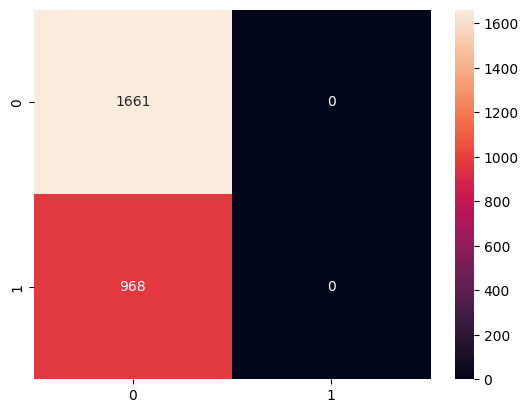

In [46]:
sklearn_model_build(LogisticRegression(), param_logit, x_train, y_train, x_test, y_test)

best parameters: {'n_neighbors': 16} 

best average precision with training data: 0.36
accuracy_score: 0.6131608976797261 
 average precision score with testing: 0.3682566584187847 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.93      0.75      1661
           1       0.37      0.07      0.12       968

    accuracy                           0.61      2629
   macro avg       0.50      0.50      0.44      2629
weighted avg       0.54      0.61      0.52      2629
 



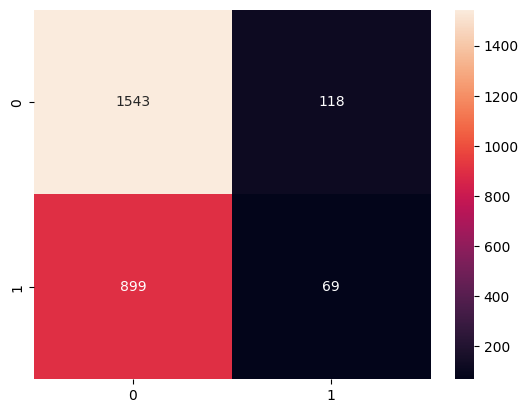

In [47]:
sklearn_model_build(KNeighborsClassifier(), param_knn, x_train, y_train, x_test, y_test)

best parameters: {'C': 0.01} 

best average precision with training data: 0.36
accuracy_score: 0.6317991631799164 
 average precision score with testing: 0.3682008368200837 

classification report 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       0.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.40      0.63      0.49      2629
 



c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


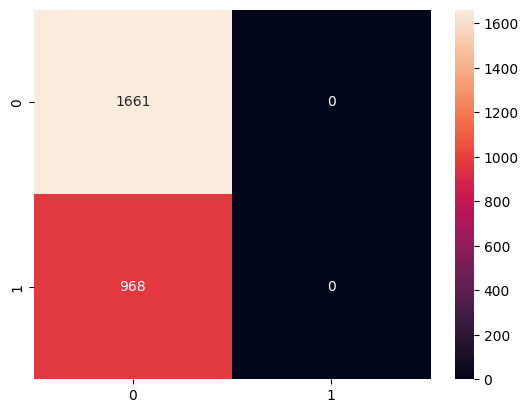

In [48]:
sklearn_model_build(SVC(), param_svm, x_train, y_train, x_test, y_test)

best parameters: {'max_depth': 5, 'n_estimators': 300} 

best average precision with training data: 0.36
accuracy_score: 0.6317991631799164 
 average precision score with testing: 0.3682008368200837 

classification report 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       0.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.40      0.63      0.49      2629
 



c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


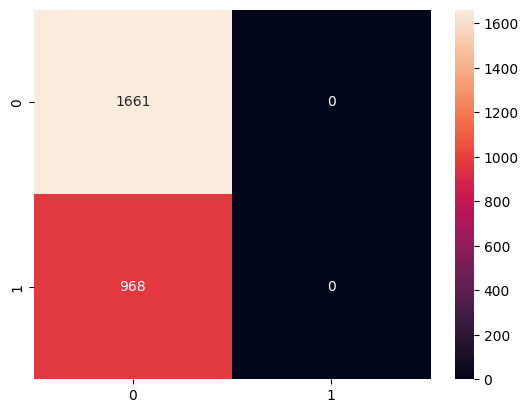

In [49]:
sklearn_model_build(RandomForestClassifier(), param_rf, x_train, y_train, x_test, y_test)

best parameters: {'eta': 0.1, 'gamma': 0.7, 'max_depth': 8, 'min_child_weight': 5} 

best average precision with training data: 0.36
accuracy_score: 0.6188664891593761 
 average precision score with testing: 0.36776250763627144 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.95      0.76      1661
           1       0.36      0.04      0.08       968

    accuracy                           0.62      2629
   macro avg       0.49      0.50      0.42      2629
weighted avg       0.53      0.62      0.51      2629
 



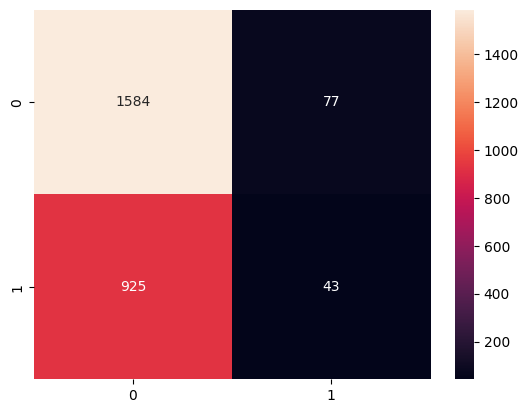

In [50]:
sklearn_model_build(XGBClassifier(), param_xg, x_train, y_train, x_test, y_test)

In [51]:
ros = RandomOverSampler(sampling_strategy=1.0)
ros_x_train, ros_y_train = ros.fit_resample(x_train, y_train)


In [52]:
ros_y_train.value_counts()

Heart Attack Risk
0    3963
1    3963
Name: count, dtype: int64

best parameters: {'C': 0.01} 

best average precision with training data: 0.51
accuracy_score: 0.500190186382655 
 average precision score with testing: 0.3666797233803665 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.51      0.56      1661
           1       0.37      0.48      0.42       968

    accuracy                           0.50      2629
   macro avg       0.50      0.50      0.49      2629
weighted avg       0.53      0.50      0.51      2629
 



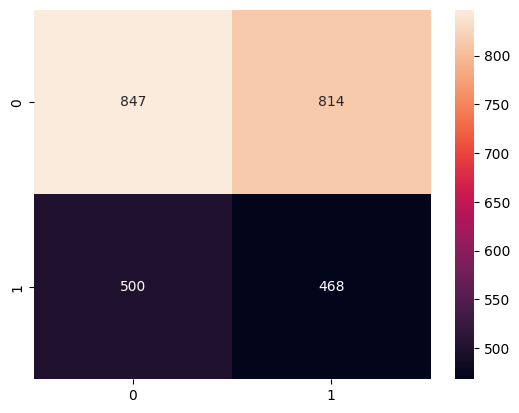

In [53]:
sklearn_model_build(LogisticRegression(), param_logit, ros_x_train, ros_y_train, x_test, y_test)

best parameters: {'n_neighbors': 2} 

best average precision with training data: 0.62
accuracy_score: 0.5534423735260555 
 average precision score with testing: 0.36191820925683643 

classification report 
               precision    recall  f1-score   support

           0       0.62      0.74      0.68      1661
           1       0.34      0.23      0.27       968

    accuracy                           0.55      2629
   macro avg       0.48      0.49      0.48      2629
weighted avg       0.52      0.55      0.53      2629
 



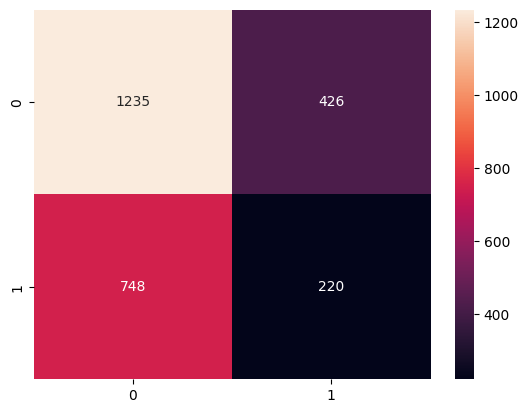

In [54]:
sklearn_model_build(KNeighborsClassifier(), param_knn, ros_x_train, ros_y_train, x_test, y_test)

best parameters: {'C': 100} 

best average precision with training data: 0.63
accuracy_score: 0.5154050969950551 
 average precision score with testing: 0.36157809764759646 

classification report 
               precision    recall  f1-score   support

           0       0.62      0.60      0.61      1661
           1       0.35      0.37      0.36       968

    accuracy                           0.52      2629
   macro avg       0.49      0.49      0.48      2629
weighted avg       0.52      0.52      0.52      2629
 



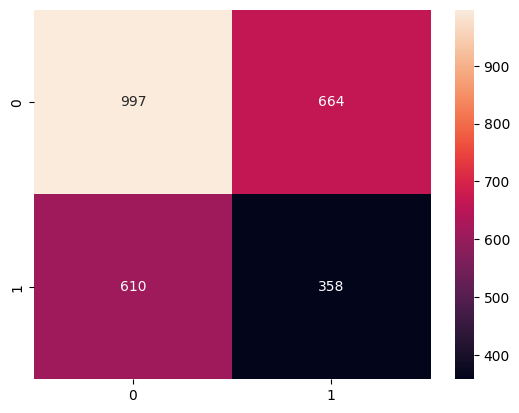

In [55]:
sklearn_model_build(SVC(), param_svm, ros_x_train, ros_y_train, x_test, y_test)

best parameters: {'max_depth': 15, 'n_estimators': 800} 

best average precision with training data: 0.91
accuracy_score: 0.601749714720426 
 average precision score with testing: 0.3653552451099047 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.90      0.74      1661
           1       0.33      0.08      0.13       968

    accuracy                           0.60      2629
   macro avg       0.48      0.49      0.44      2629
weighted avg       0.52      0.60      0.52      2629
 



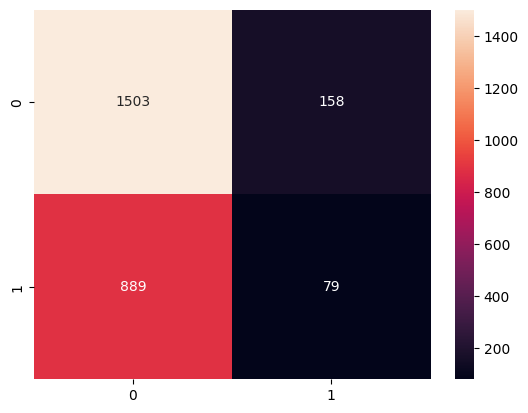

In [56]:
sklearn_model_build(RandomForestClassifier(), param_rf, ros_x_train, ros_y_train, x_test, y_test)

best parameters: {'eta': 0.1, 'gamma': 0.05, 'max_depth': 15, 'min_child_weight': 1} 

best average precision with training data: 0.9
accuracy_score: 0.5796880943324458 
 average precision score with testing: 0.3683651300193188 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.80      0.71      1661
           1       0.37      0.20      0.26       968

    accuracy                           0.58      2629
   macro avg       0.50      0.50      0.48      2629
weighted avg       0.54      0.58      0.54      2629
 



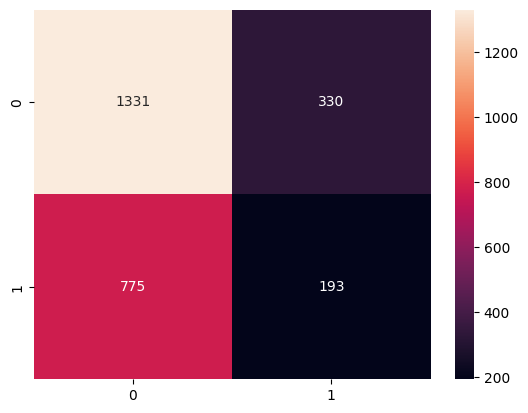

In [57]:
sklearn_model_build(XGBClassifier(), param_xg, ros_x_train, ros_y_train, x_test, y_test)

In [58]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6134 entries, 2123 to 537
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6134 non-null   float64
 1   Cholesterol                        6134 non-null   float64
 2   Heart Rate                         6134 non-null   float64
 3   Exercise Hours Per Week            6134 non-null   float64
 4   Sedentary Hours Per Day            6134 non-null   float64
 5   Income                             6134 non-null   float64
 6   Sleep Hours Per Day                6134 non-null   float64
 7   Sex                                6134 non-null   int64  
 8   Diabetes                           6134 non-null   int64  
 9   Family History                     6134 non-null   int64  
 10  Smoking                            6134 non-null   int64  
 11  Obesity                            6134 non-null   int64  


In [59]:
one_hot_list = list(onehot.get_feature_names_out())

In [60]:
smote_nc = SMOTENC(categorical_features=one_hot_list)
smote_nc_x_train, smote_nc_y_train = smote_nc.fit_resample(x_train, y_train)


In [61]:
smote_nc_y_train.value_counts()

Heart Attack Risk
0    3963
1    3963
Name: count, dtype: int64

c:\Users\dgmur\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dgmur\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

best parameters: {'C': 50} 

best average precision with training data: 0.71
accuracy_score: 0.6317991631799164 
 average precision score with testing: 0.36874546146132303 

classification report 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       0.50      0.00      0.01       968

    accuracy                           0.63      2629
   macro avg       0.57      0.50      0.39      2629
weighted avg       0.58      0.63      0.49      2629
 



c:\Users\dgmur\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dgmur\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

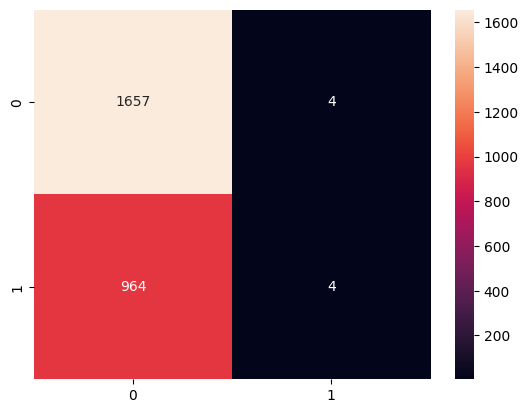

In [62]:
sklearn_model_build(LogisticRegression(), param_logit, smote_nc_x_train, smote_nc_y_train, x_test, y_test)

best parameters: {'n_neighbors': 8} 

best average precision with training data: 0.7
accuracy_score: 0.5249144161278052 
 average precision score with testing: 0.3632341184495801 

classification report 
               precision    recall  f1-score   support

           0       0.62      0.63      0.62      1661
           1       0.35      0.35      0.35       968

    accuracy                           0.52      2629
   macro avg       0.49      0.49      0.49      2629
weighted avg       0.52      0.52      0.52      2629
 



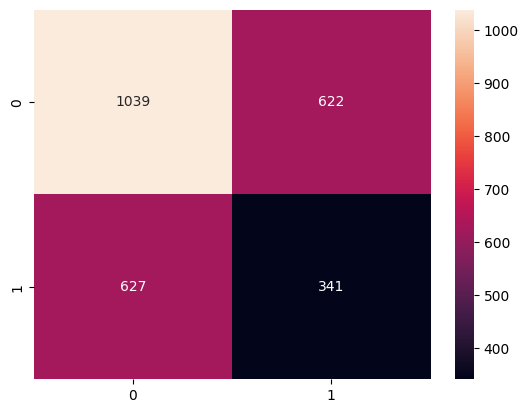

In [63]:
sklearn_model_build(KNeighborsClassifier(), param_knn, smote_nc_x_train, smote_nc_y_train, x_test, y_test)

best parameters: {'C': 50} 

best average precision with training data: 0.73
accuracy_score: 0.5697984024343857 
 average precision score with testing: 0.36724124563912064 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.77      0.69      1661
           1       0.36      0.23      0.28       968

    accuracy                           0.57      2629
   macro avg       0.50      0.50      0.49      2629
weighted avg       0.53      0.57      0.54      2629
 



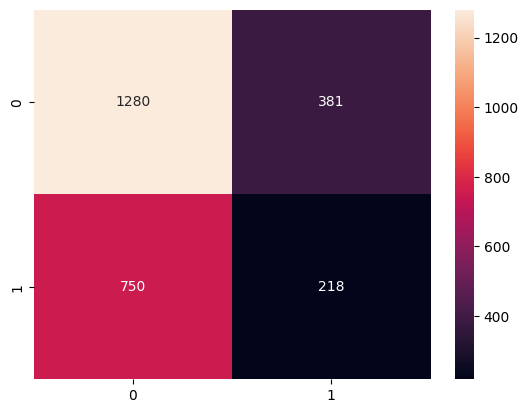

In [64]:
sklearn_model_build(SVC(), param_svm, smote_nc_x_train, smote_nc_y_train, x_test, y_test)

best parameters: {'max_depth': 15, 'n_estimators': 800} 

best average precision with training data: 0.77
accuracy_score: 0.605553442373526 
 average precision score with testing: 0.37250368330838923 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.88      0.74      1661
           1       0.40      0.14      0.21       968

    accuracy                           0.61      2629
   macro avg       0.52      0.51      0.47      2629
weighted avg       0.55      0.61      0.54      2629
 



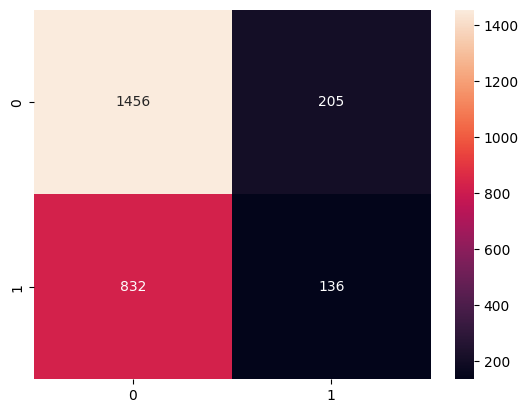

In [65]:
sklearn_model_build(RandomForestClassifier(), param_rf, smote_nc_x_train, smote_nc_y_train, x_test, y_test)

best parameters: {'eta': 0.1, 'gamma': 0.05, 'max_depth': 15, 'min_child_weight': 1} 

best average precision with training data: 0.76
accuracy_score: 0.5781666032712058 
 average precision score with testing: 0.36588379899589263 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.81      0.71      1661
           1       0.36      0.18      0.24       968

    accuracy                           0.58      2629
   macro avg       0.49      0.49      0.47      2629
weighted avg       0.53      0.58      0.54      2629
 



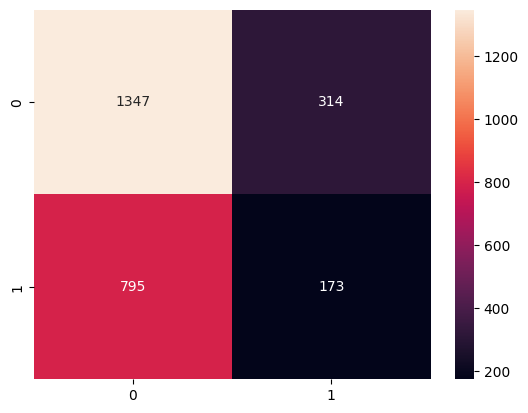

In [66]:
sklearn_model_build(XGBClassifier(), param_xg, smote_nc_x_train, smote_nc_y_train, x_test, y_test)

In [67]:

overbagging_clf = BalancedBaggingClassifier(estimator=XGBClassifier(gamma = 0.05, eta = 0.01, max_depth = 5, min_child_weight = 3), sampler=RandomOverSampler(shrinkage=1)).fit(x_train, y_train)


In [68]:
over_bagging_predict = overbagging_clf.predict(x_test)
print('accuracy score:', accuracy_score(y_test, over_bagging_predict), '\n','average precision score:',average_precision_score(y_test,over_bagging_predict), '\n', classification_report(y_test, over_bagging_predict))

accuracy score: 0.6317991631799164 
 average precision score: 0.3682008368200837 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       0.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.40      0.63      0.49      2629



c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
# Assuming `one_hot_list` is a list of column names, convert these to indices
if isinstance(x_train, pd.DataFrame):
    categorical_features_indices = [x_train.columns.get_loc(col) for col in one_hot_list]
else:
    # x_train is a NumPy array, so ensure `one_hot_list` contains the correct integer indices
    categorical_features_indices = one_hot_list  # This should be the list of integer indices for categorical features

smotebagging_clf = BalancedBaggingClassifier(
    estimator=XGBClassifier(gamma=0.05, eta=0.01, max_depth=5, min_child_weight=3),
    sampler=SMOTENC(categorical_features=categorical_features_indices)
).fit(x_train, y_train)

smotebagging_predict = smotebagging_clf.predict(x_test)
print('accuracy score:', accuracy_score(y_test, smotebagging_predict),'\n', 'average precision score', average_precision_score(y_test, smotebagging_predict), '\n', classification_report(y_test, smotebagging_predict))


accuracy score: 0.5728413845568657 
 average precision score 0.37243672225877433 
               precision    recall  f1-score   support

           0       0.64      0.75      0.69      1661
           1       0.38      0.27      0.31       968

    accuracy                           0.57      2629
   macro avg       0.51      0.51      0.50      2629
weighted avg       0.54      0.57      0.55      2629



In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                8763 non-null   float64
 1   Cholesterol                        8763 non-null   float64
 2   Heart Rate                         8763 non-null   float64
 3   Exercise Hours Per Week            8763 non-null   float64
 4   Sedentary Hours Per Day            8763 non-null   float64
 5   Income                             8763 non-null   float64
 6   Sleep Hours Per Day                8763 non-null   float64
 7   Sex                                8763 non-null   int64  
 8   Diabetes                           8763 non-null   int64  
 9   Family History                     8763 non-null   int64  
 10  Smoking                            8763 non-null   int64  
 11  Obesity                            8763 non-null   int64

In [72]:
new_x = df[fl_columns]
new_y = df['Heart Attack Risk']

In [73]:
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x,new_y, test_size=0.3, random_state=7 )

best parameters: {'C': 0.01} 

best average precision with training data: 0.36
accuracy_score: 0.6317991631799164 
 average precision score with testing: 0.3682008368200837 

classification report 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       0.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.40      0.63      0.49      2629
 



c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dgmur\python\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


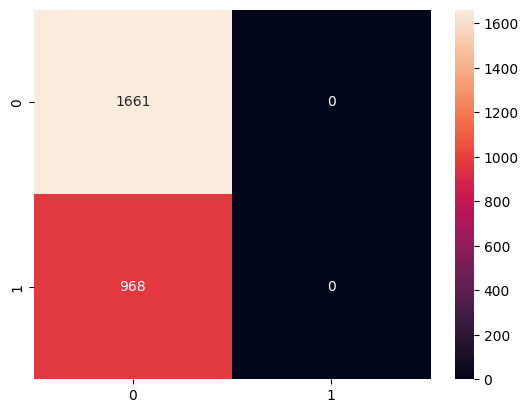

In [74]:
sklearn_model_build(LogisticRegression(), param_logit, new_x_train, new_y_train, new_x_test, new_y_test)

best parameters: {'n_neighbors': 8} 

best average precision with training data: 0.36
accuracy_score: 0.605173069608216 
 average precision score with testing: 0.369783294415997 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.89      0.74      1661
           1       0.38      0.12      0.18       968

    accuracy                           0.61      2629
   macro avg       0.51      0.50      0.46      2629
weighted avg       0.54      0.61      0.53      2629
 



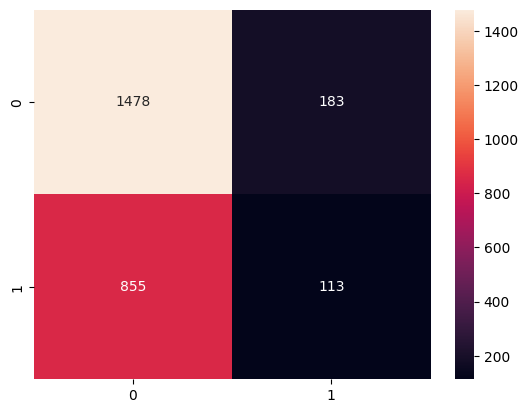

In [75]:
sklearn_model_build(KNeighborsClassifier(), param_knn, new_x_train, new_y_train, new_x_test, new_y_test)

best parameters: {'C': 100} 

best average precision with training data: 0.35
accuracy_score: 0.5838721947508558 
 average precision score with testing: 0.36721385329993383 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.82      0.71      1661
           1       0.36      0.17      0.23       968

    accuracy                           0.58      2629
   macro avg       0.50      0.50      0.47      2629
weighted avg       0.53      0.58      0.54      2629
 



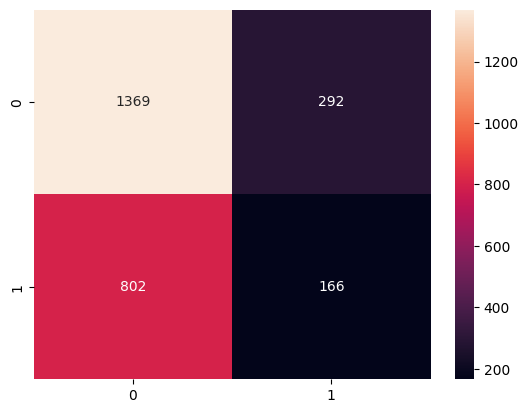

In [76]:
sklearn_model_build(SVC(), param_svm, new_x_train, new_y_train, new_x_test, new_y_test)

best parameters: {'max_depth': 8, 'n_estimators': 800} 

best average precision with training data: 0.36
accuracy_score: 0.6314187904146064 
 average precision score with testing: 0.3682665375704554 

classification report 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       0.40      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.52      0.50      0.39      2629
weighted avg       0.55      0.63      0.49      2629
 



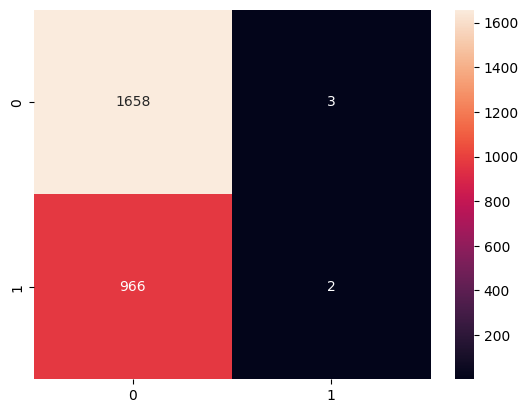

In [77]:
sklearn_model_build(RandomForestClassifier(), param_rf, new_x_train, new_y_train, new_x_test, new_y_test)

best parameters: {'eta': 0.1, 'gamma': 0.9, 'max_depth': 15, 'min_child_weight': 7} 

best average precision with training data: 0.37
accuracy_score: 0.6173449980981361 
 average precision score with testing: 0.3663999989151579 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.96      0.76      1661
           1       0.31      0.03      0.06       968

    accuracy                           0.62      2629
   macro avg       0.47      0.50      0.41      2629
weighted avg       0.51      0.62      0.50      2629
 



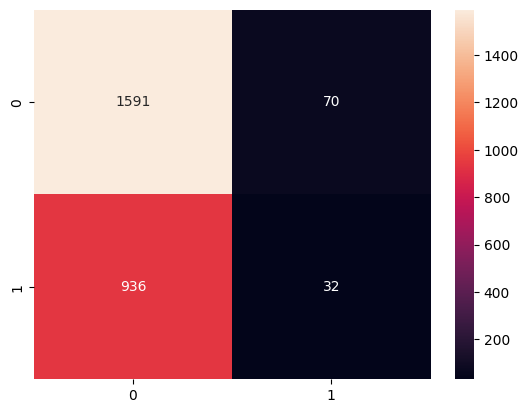

In [78]:
sklearn_model_build(XGBClassifier(), param_xg, new_x_train, new_y_train, new_x_test, new_y_test)

In [79]:
new_ros = RandomOverSampler(sampling_strategy=1.0)
new_ros_x_train, new_ros_y_train = new_ros.fit_resample(new_x_train, new_y_train)

best parameters: {'C': 100} 

best average precision with training data: 0.51
accuracy_score: 0.500950931913275 
 average precision score with testing: 0.36765026300876724 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.51      0.56      1661
           1       0.37      0.49      0.42       968

    accuracy                           0.50      2629
   macro avg       0.50      0.50      0.49      2629
weighted avg       0.53      0.50      0.51      2629
 



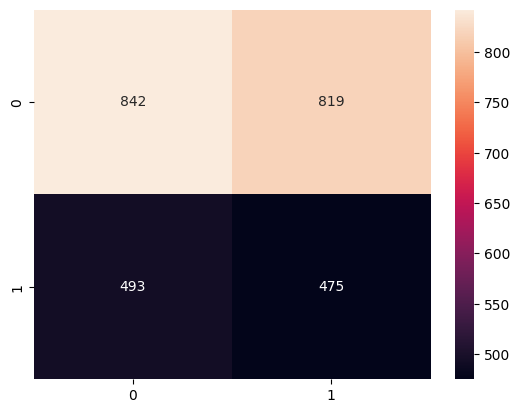

In [80]:
sklearn_model_build(LogisticRegression(), param_logit, new_ros_x_train, new_ros_y_train, new_x_test, new_y_test)

best parameters: {'n_neighbors': 2} 

best average precision with training data: 0.63
accuracy_score: 0.5682769113731457 
 average precision score with testing: 0.37116722895212734 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.74      0.68      1661
           1       0.38      0.27      0.32       968

    accuracy                           0.57      2629
   macro avg       0.51      0.51      0.50      2629
weighted avg       0.54      0.57      0.55      2629
 



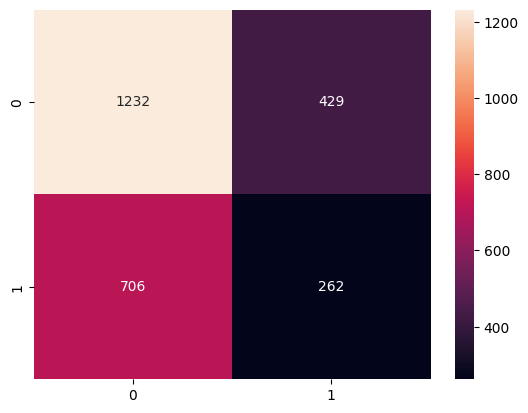

In [81]:
sklearn_model_build(KNeighborsClassifier(), param_knn, new_ros_x_train, new_ros_y_train, new_x_test, new_y_test)

best parameters: {'C': 100} 

best average precision with training data: 0.6
accuracy_score: 0.5176873335869152 
 average precision score with testing: 0.36779604048169945 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.57      0.60      1661
           1       0.37      0.43      0.40       968

    accuracy                           0.52      2629
   macro avg       0.50      0.50      0.50      2629
weighted avg       0.53      0.52      0.52      2629
 



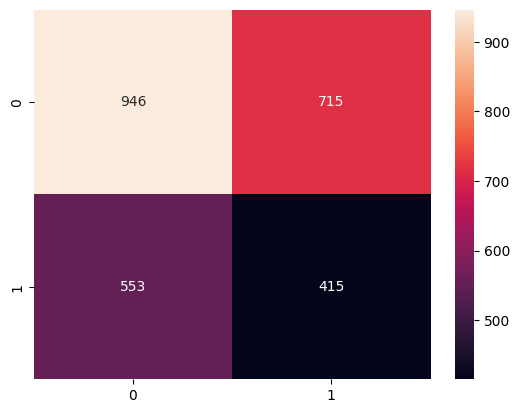

In [82]:
sklearn_model_build(SVC(), param_svm, new_ros_x_train, new_ros_y_train, new_x_test, new_y_test)

best parameters: {'max_depth': 15, 'n_estimators': 300} 

best average precision with training data: 0.88
accuracy_score: 0.5747432483834157 
 average precision score with testing: 0.3667726379427597 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      1661
           1       0.36      0.20      0.26       968

    accuracy                           0.57      2629
   macro avg       0.50      0.50      0.48      2629
weighted avg       0.53      0.57      0.54      2629
 



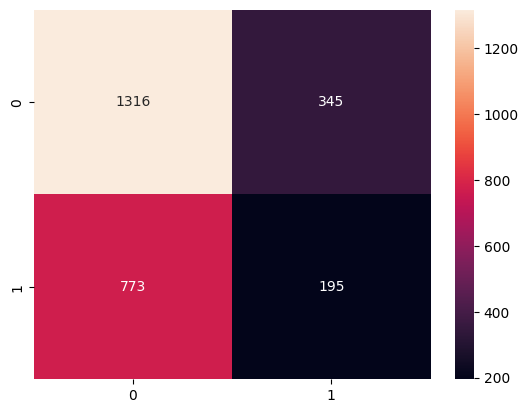

In [83]:
sklearn_model_build(RandomForestClassifier(), param_rf, new_ros_x_train, new_ros_y_train, new_x_test, new_y_test)

best parameters: {'eta': 0.1, 'gamma': 0.05, 'max_depth': 15, 'min_child_weight': 1} 

best average precision with training data: 0.89
accuracy_score: 0.5739825028527957 
 average precision score with testing: 0.37256912462918895 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.76      0.69      1661
           1       0.38      0.26      0.31       968

    accuracy                           0.57      2629
   macro avg       0.51      0.51      0.50      2629
weighted avg       0.54      0.57      0.55      2629
 



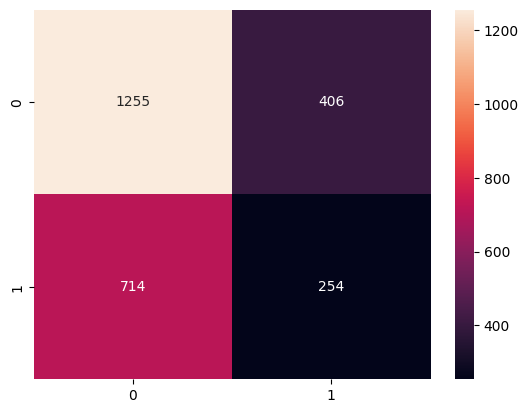

In [84]:
sklearn_model_build(XGBClassifier(), param_xg, new_ros_x_train, new_ros_y_train, new_x_test, new_y_test)

In [85]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

smote_new_x_train, smote_new_y_train = smote.fit_resample(new_x_train, new_y_train)

best parameters: {'C': 0.001} 

best average precision with training data: 0.5
accuracy_score: 0.504374286801065 
 average precision score with testing: 0.3705423039919081 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.50      0.56      1661
           1       0.37      0.51      0.43       968

    accuracy                           0.50      2629
   macro avg       0.50      0.50      0.50      2629
weighted avg       0.54      0.50      0.51      2629
 



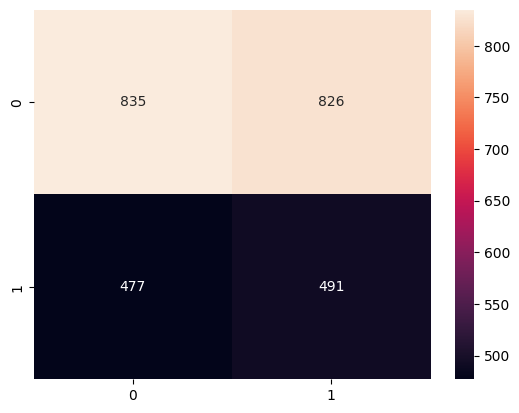

In [86]:
sklearn_model_build(LogisticRegression(), param_logit, smote_new_x_train, smote_new_y_train, new_x_test, new_y_test)

best parameters: {'n_neighbors': 2} 

best average precision with training data: 0.66
accuracy_score: 0.5663750475465956 
 average precision score with testing: 0.3699092314947843 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.74      0.68      1661
           1       0.37      0.27      0.31       968

    accuracy                           0.57      2629
   macro avg       0.50      0.50      0.50      2629
weighted avg       0.54      0.57      0.55      2629
 



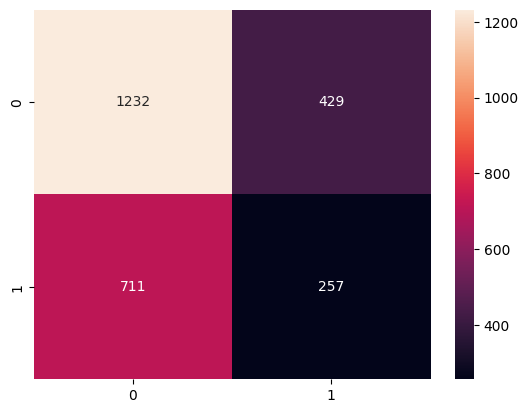

In [87]:
sklearn_model_build(KNeighborsClassifier(), param_knn, smote_new_x_train, smote_new_y_train, new_x_test, new_y_test)

best parameters: {'C': 100} 

best average precision with training data: 0.6
accuracy_score: 0.5252947888931152 
 average precision score with testing: 0.3716716809263102 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      1661
           1       0.38      0.44      0.41       968

    accuracy                           0.53      2629
   macro avg       0.51      0.51      0.51      2629
weighted avg       0.54      0.53      0.53      2629
 



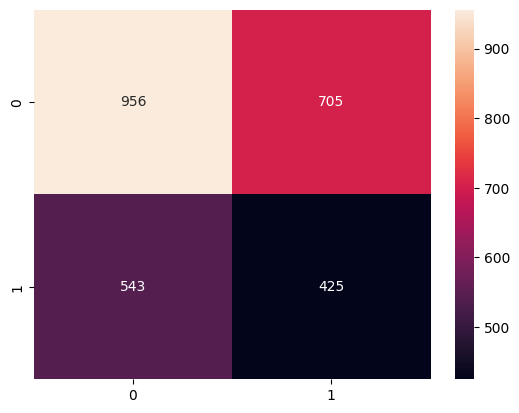

In [88]:
sklearn_model_build(SVC(), param_svm, smote_new_x_train, smote_new_y_train, new_x_test, new_y_test)

best parameters: {'max_depth': 15, 'n_estimators': 800} 

best average precision with training data: 0.76
accuracy_score: 0.5618105743628756 
 average precision score with testing: 0.37311180199938454 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.71      0.67      1661
           1       0.38      0.31      0.35       968

    accuracy                           0.56      2629
   macro avg       0.51      0.51      0.51      2629
weighted avg       0.54      0.56      0.55      2629
 



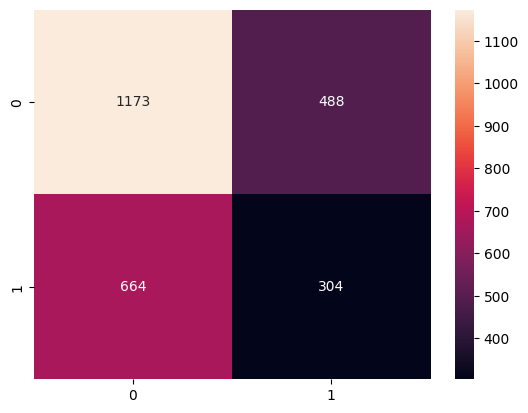

In [89]:
sklearn_model_build(RandomForestClassifier(), param_rf, smote_new_x_train, smote_new_y_train, new_x_test, new_y_test)

best parameters: {'eta': 0.1, 'gamma': 0.05, 'max_depth': 15, 'min_child_weight': 1} 

best average precision with training data: 0.76
accuracy_score: 0.5785469760365158 
 average precision score with testing: 0.38126902371682425 

classification report 
               precision    recall  f1-score   support

           0       0.65      0.73      0.69      1661
           1       0.41      0.32      0.36       968

    accuracy                           0.58      2629
   macro avg       0.53      0.53      0.52      2629
weighted avg       0.56      0.58      0.57      2629
 



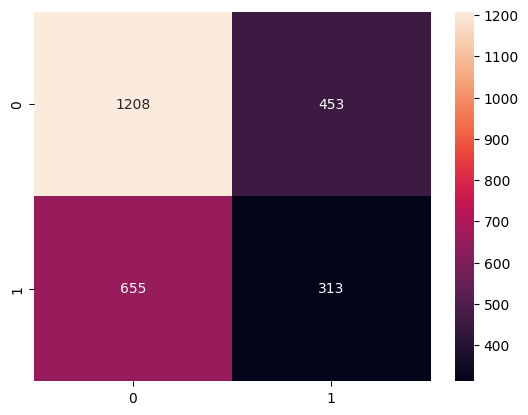

In [90]:
sklearn_model_build(XGBClassifier(), param_xg, smote_new_x_train, smote_new_y_train, new_x_test, new_y_test)

In [91]:
b_smote = BorderlineSMOTE()

bsmote_new_x_train, bsmote_new_y_train = b_smote.fit_resample(new_x_train, new_y_train)

best parameters: {'C': 5} 

best average precision with training data: 0.51
accuracy_score: 0.501711677443895 
 average precision score with testing: 0.3683298410414234 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.51      0.56      1661
           1       0.37      0.49      0.42       968

    accuracy                           0.50      2629
   macro avg       0.50      0.50      0.49      2629
weighted avg       0.53      0.50      0.51      2629
 



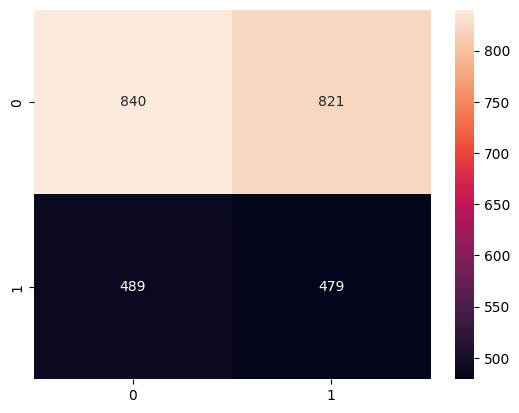

In [92]:
sklearn_model_build(LogisticRegression(), param_logit, bsmote_new_x_train, bsmote_new_y_train, new_x_test, new_y_test)

best parameters: {'n_neighbors': 2} 

best average precision with training data: 0.66
accuracy_score: 0.5595283377710156 
 average precision score with testing: 0.3652535700551279 

classification report 
               precision    recall  f1-score   support

           0       0.63      0.74      0.68      1661
           1       0.36      0.24      0.29       968

    accuracy                           0.56      2629
   macro avg       0.49      0.49      0.48      2629
weighted avg       0.53      0.56      0.54      2629
 



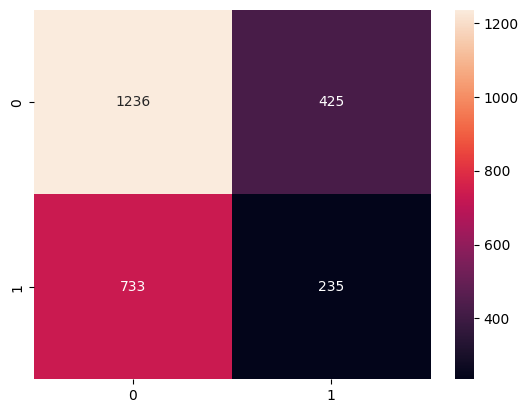

In [93]:
sklearn_model_build(KNeighborsClassifier(), param_knn, bsmote_new_x_train, bsmote_new_y_train, new_x_test, new_y_test)

best parameters: {'C': 100} 

best average precision with training data: 0.58
accuracy_score: 0.5237732978318752 
 average precision score with testing: 0.3743578101492336 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.55      0.60      1661
           1       0.38      0.47      0.42       968

    accuracy                           0.52      2629
   macro avg       0.51      0.51      0.51      2629
weighted avg       0.55      0.52      0.53      2629
 



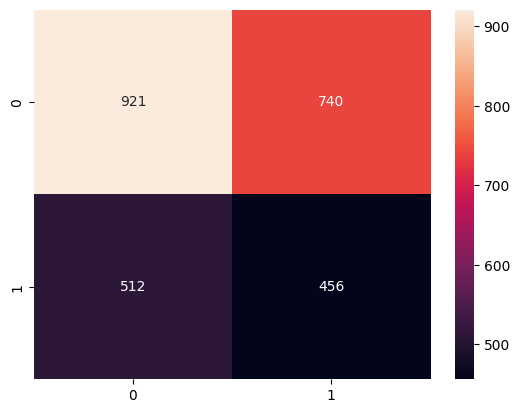

In [94]:
sklearn_model_build(SVC(), param_svm, bsmote_new_x_train, bsmote_new_y_train, new_x_test, new_y_test)

best parameters: {'max_depth': 15, 'n_estimators': 800} 

best average precision with training data: 0.76
accuracy_score: 0.5534423735260555 
 average precision score with testing: 0.3707879649175948 

classification report 
               precision    recall  f1-score   support

           0       0.64      0.69      0.66      1661
           1       0.38      0.32      0.35       968

    accuracy                           0.55      2629
   macro avg       0.51      0.51      0.50      2629
weighted avg       0.54      0.55      0.55      2629
 



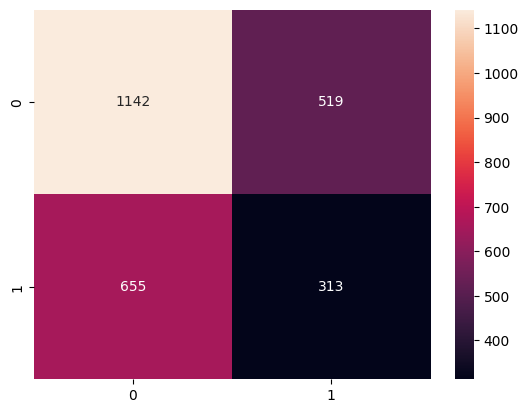

In [95]:
sklearn_model_build(RandomForestClassifier(), param_rf, bsmote_new_x_train, bsmote_new_y_train, new_x_test, new_y_test)

best parameters: {'eta': 0.1, 'gamma': 0.05, 'max_depth': 15, 'min_child_weight': 1} 

best average precision with training data: 0.77
accuracy_score: 0.5815899581589958 
 average precision score with testing: 0.37979708622772984 

classification report 
               precision    recall  f1-score   support

           0       0.65      0.75      0.69      1661
           1       0.41      0.30      0.34       968

    accuracy                           0.58      2629
   macro avg       0.53      0.52      0.52      2629
weighted avg       0.56      0.58      0.56      2629
 



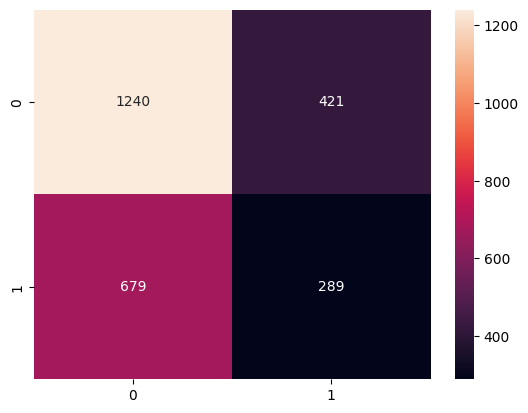

In [96]:
sklearn_model_build(XGBClassifier(), param_xg, bsmote_new_x_train, bsmote_new_y_train, new_x_test, new_y_test)

In [97]:
new_overbagging_clf = BalancedBaggingClassifier(estimator=XGBClassifier(gamma = 0.05, eta = 0.1, max_depth = 15, min_child_weight = 1), sampler=RandomOverSampler(shrinkage=1)).fit(new_x_train, new_y_train)
new_overbagging_predict = new_overbagging_clf.predict(new_x_test)
print('accuracy score:', accuracy_score(new_y_test, new_overbagging_predict),'\n', 'average precision score:', average_precision_score(new_y_test, new_overbagging_predict),'\n', classification_report(new_y_test, new_overbagging_predict))

accuracy score: 0.603271205781666 
 average precision score: 0.37255374837702093 
               precision    recall  f1-score   support

           0       0.64      0.87      0.73      1661
           1       0.40      0.15      0.22       968

    accuracy                           0.60      2629
   macro avg       0.52      0.51      0.48      2629
weighted avg       0.55      0.60      0.54      2629



In [98]:
smotebagging_clf = BalancedBaggingClassifier(estimator=XGBClassifier(gamma = 0.05, eta = 0.1, max_depth = 15, min_child_weight = 1), sampler=SMOTE()).fit(new_x_train, new_y_train)
smotebagging_predict = smotebagging_clf.predict(new_x_test)
print('accuracy score:', accuracy_score(new_y_test, smotebagging_predict), '\n', 'average precision score:', average_precision_score(new_y_test, new_overbagging_predict),'\n', classification_report(new_y_test, smotebagging_predict))

accuracy score: 0.5789273488018258 
 average precision score: 0.37255374837702093 
               precision    recall  f1-score   support

           0       0.63      0.79      0.70      1661
           1       0.38      0.22      0.28       968

    accuracy                           0.58      2629
   macro avg       0.51      0.50      0.49      2629
weighted avg       0.54      0.58      0.55      2629



In [99]:
bsmotebagging_clf = BalancedBaggingClassifier(estimator=XGBClassifier(gamma = 0.05, eta = 0.1, max_depth = 15, min_child_weight = 1), sampler=BorderlineSMOTE()).fit(new_x_train, new_y_train)
bsmotebagging_predict = bsmotebagging_clf.predict(new_x_test)
print('accuracy score:', accuracy_score(new_y_test, bsmotebagging_predict), '\n', 'average precision score:', average_precision_score(new_y_test, new_overbagging_predict),'\n', classification_report(new_y_test, bsmotebagging_predict))

accuracy score: 0.5770254849752757 
 average precision score: 0.37255374837702093 
               precision    recall  f1-score   support

           0       0.63      0.78      0.70      1661
           1       0.38      0.23      0.28       968

    accuracy                           0.58      2629
   macro avg       0.51      0.50      0.49      2629
weighted avg       0.54      0.58      0.55      2629

